# K-Nearest Neighbor

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle
import time

### Data Preparation 

In [2]:
df = pd.read_csv('Data/voice.csv')

x = df.iloc[:,:-1]
y = df.label

### Methodology

In [3]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [4]:
param_grid = {
    'metric' : ['minkowski'],
    'p' : [1, 2],
    'n_neighbors' : [1, 5, 10 ,15, 100],
    'leaf_size' : [5, 10, 15, 20, 50]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.779 total time=   0.0s
[CV 2/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.783 total time=   0.1s
[CV 3/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.789 total time=   0.0s
[CV 4/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.773 total time=   0.1s
[CV 5/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.767 total time=   0.0s
[CV 1/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.665 total time=   0.0s
[CV 2/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.704 total time=   0.0s
[CV 3/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.738 total time=   0.0s
[CV 4/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.714 total time=   0.0s
[CV 5/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.7

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15, 20, 50],
                         'metric': ['minkowski'],
                         'n_neighbors': [1, 5, 10, 15, 100], 'p': [1, 2]},
             verbose=3)

In [5]:
print(f'Params: {grid.best_params_}')

Params: {'leaf_size': 5, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}


In [4]:
start_timer = time.perf_counter()
KNmodel = KNeighborsClassifier(n_neighbors =1, metric = 'minkowski', p = 1, leaf_size = 1)
KNmodel.fit(x_train, y_train)
pickle.dump(KNmodel, open("Models/KNN.pickle", "wb"))
end_timer = time.perf_counter()
print(f"KNN time to train: {end_timer - start_timer:0.4f} seconds")
y_pred = KNmodel.predict(x_test)

KNN time to train: 0.0066 seconds


### Evaluation

#### Accuracy

In [7]:
print("KNN Accuracy score: ",accuracy_score(y_pred,y_test)*100,"%")

KNN Accuracy score:  77.44479495268138 %


#### Confusion Matrix

In [10]:
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

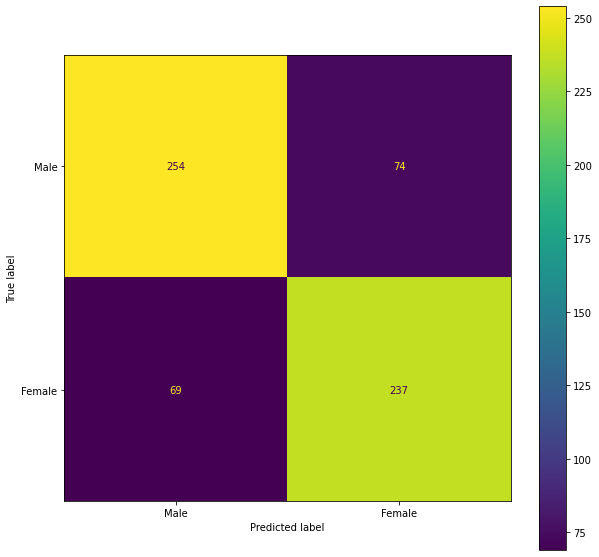

In [8]:
c = confusion_matrix(y_test, y_pred)
cp = ConfusionMatrixDisplay(c, display_labels=["Male", "Female"])
fig, ax = plt.subplots(figsize=(10,10))
cp.plot(ax = ax)

#### Classification Report

In [9]:
print("\t\t\tKNN report:\n",classification_report(y_pred,y_test, digits=3))

			KNN report:
               precision    recall  f1-score   support

      female      0.774     0.786     0.780       323
        male      0.775     0.762     0.768       311

    accuracy                          0.774       634
   macro avg      0.774     0.774     0.774       634
weighted avg      0.774     0.774     0.774       634

